# CREDIT SCORING MODEL

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [11]:
df = pd.read_csv("credit.csv")
df_i = pd.read_csv("credit.csv")

In [12]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [13]:
df.shape

(5960, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [15]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [16]:
print(df["REASON"].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


In [17]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [18]:
print(df["JOB"].value_counts())

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


0    4771
1    1189
Name: BAD, dtype: int64


<Axes: >

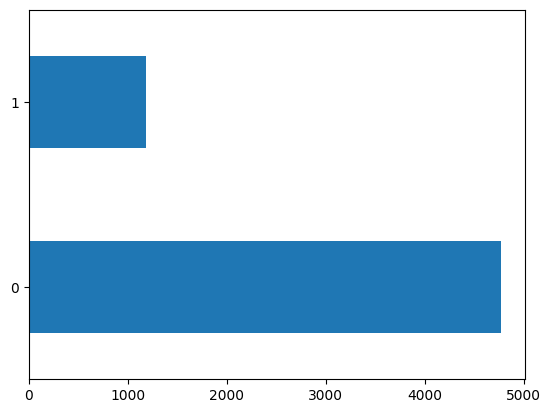

In [19]:
print(df["BAD"].value_counts())
df["BAD"].value_counts().plot(kind="barh")

<Axes: ylabel='Frequency'>

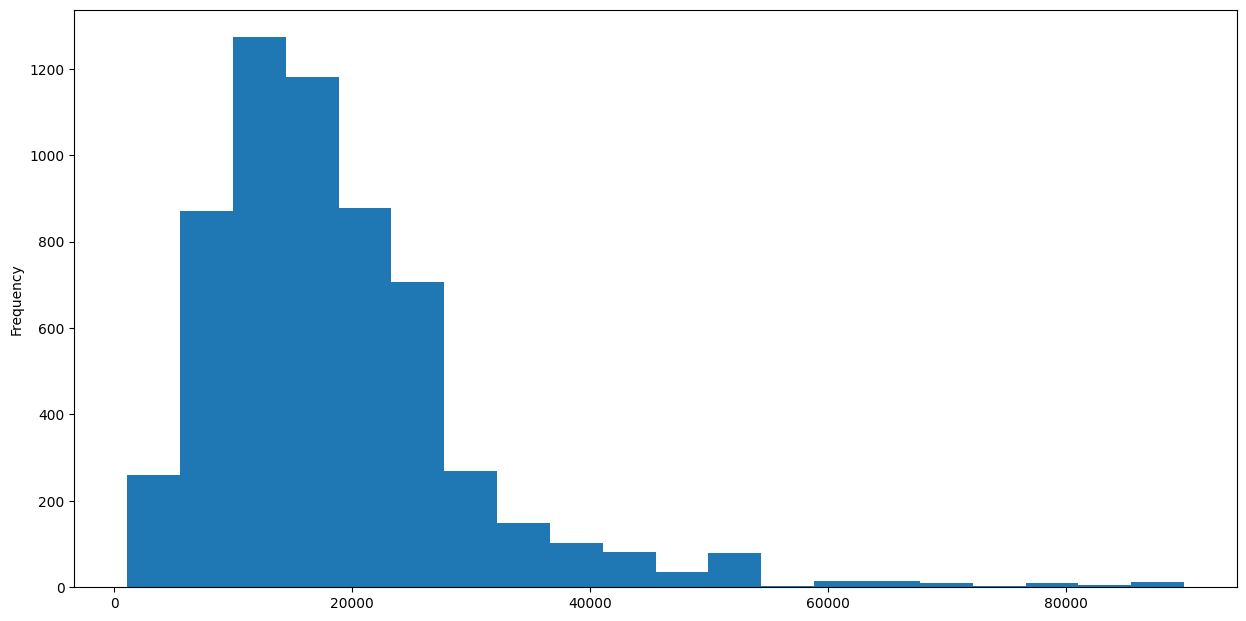

In [20]:
df["LOAN"].plot.hist(bins = 20,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

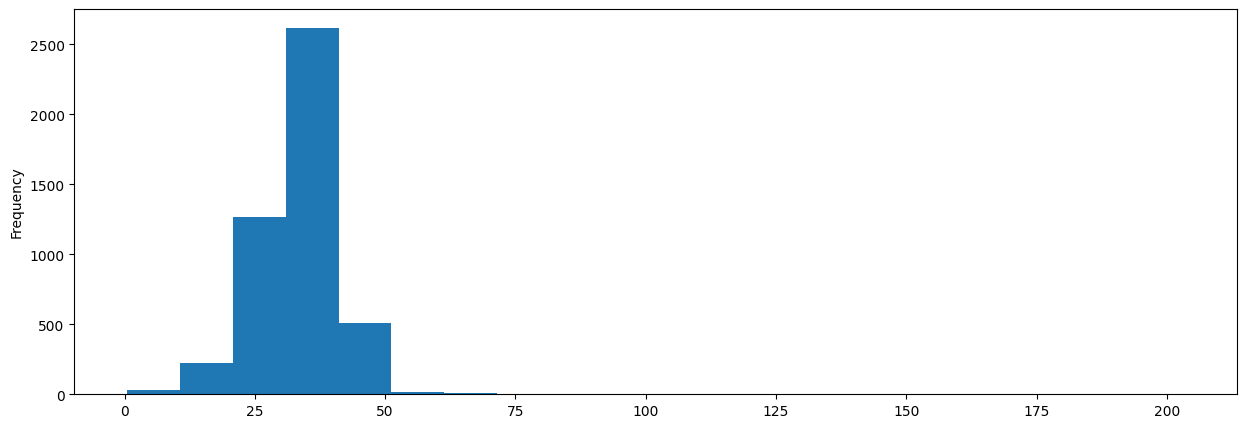

In [21]:
df["DEBTINC"].plot.hist(bins = 20,figsize=(15,5))

<Axes: ylabel='Frequency'>

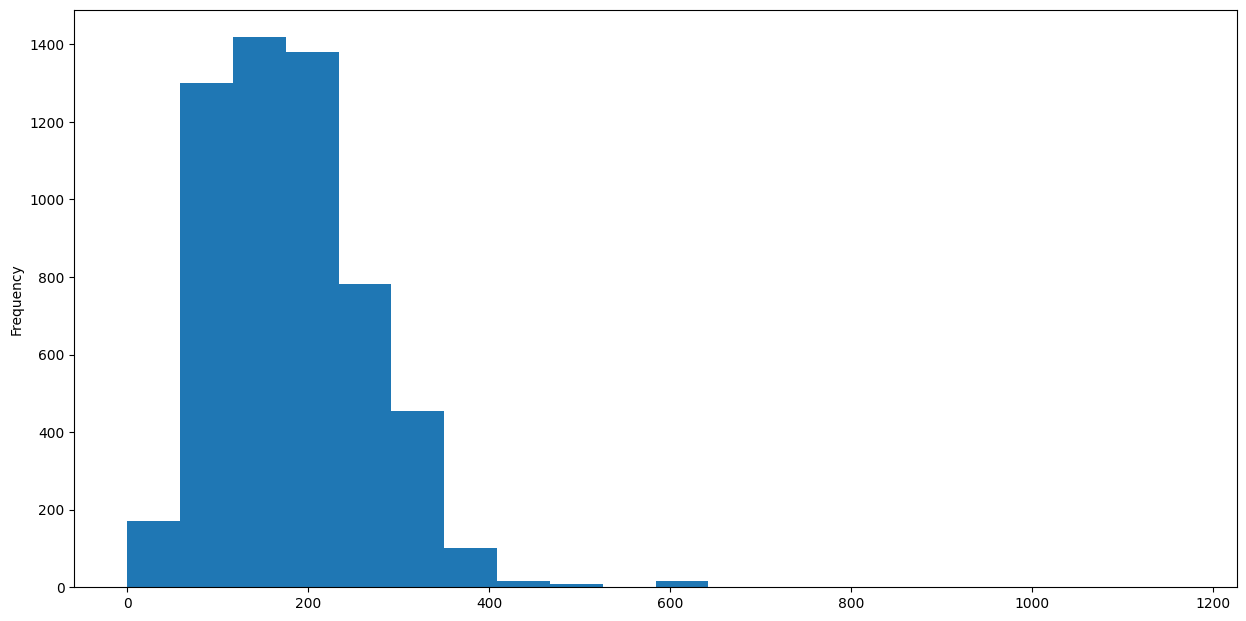

In [22]:
df["CLAGE"].plot.hist(bins = 20,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

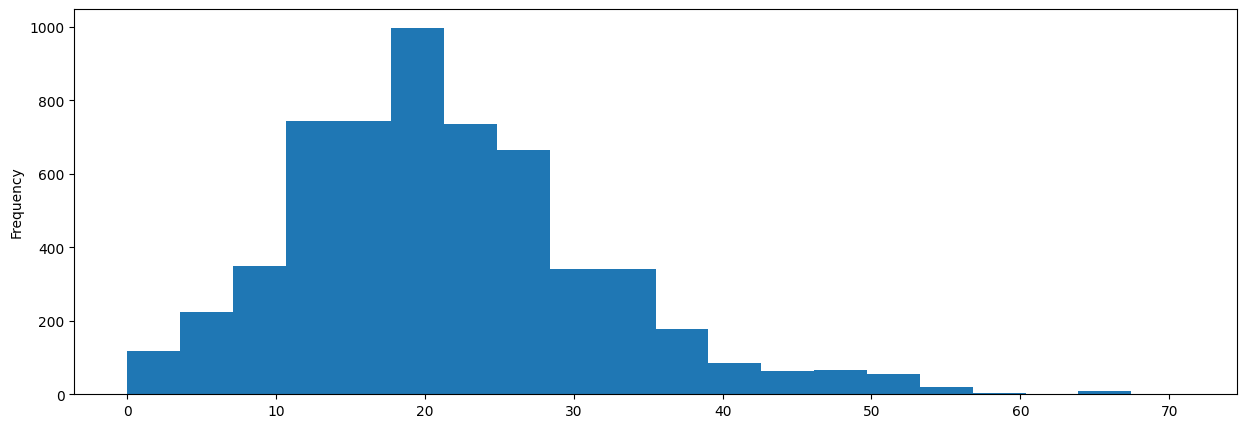

In [23]:
df["CLNO"].plot.hist(bins = 20,figsize=(15,5))

<Axes: ylabel='Frequency'>

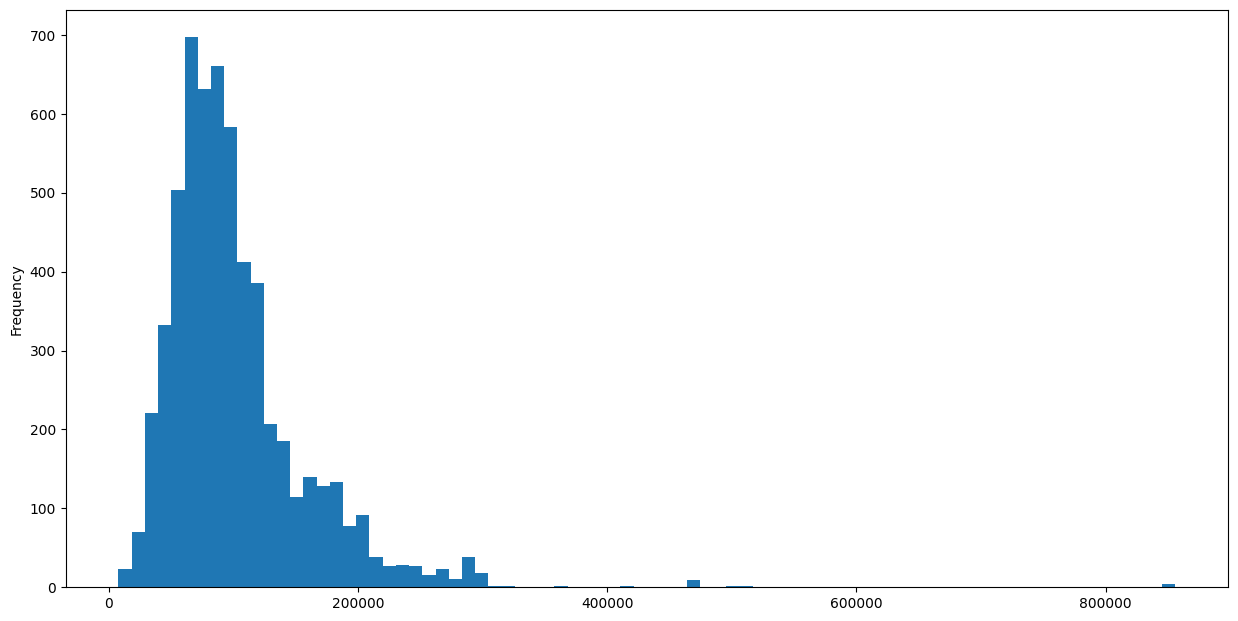

In [24]:
df["VALUE"].plot.hist(bins = 80,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

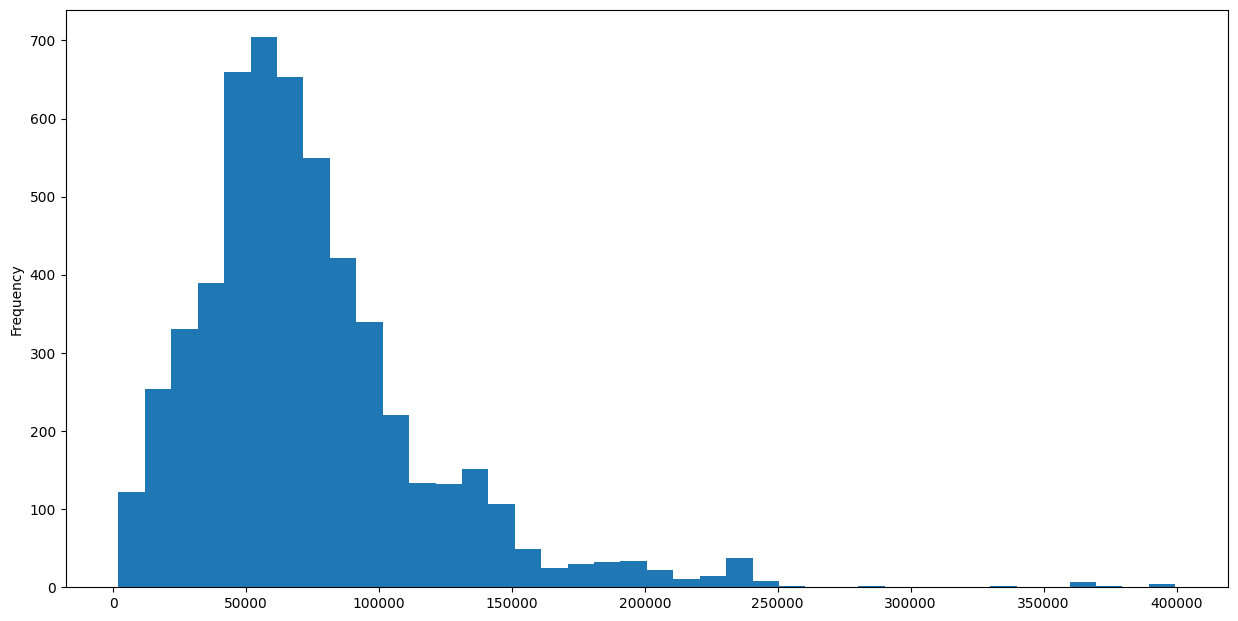

In [25]:
df["MORTDUE"].plot.hist(bins = 40,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

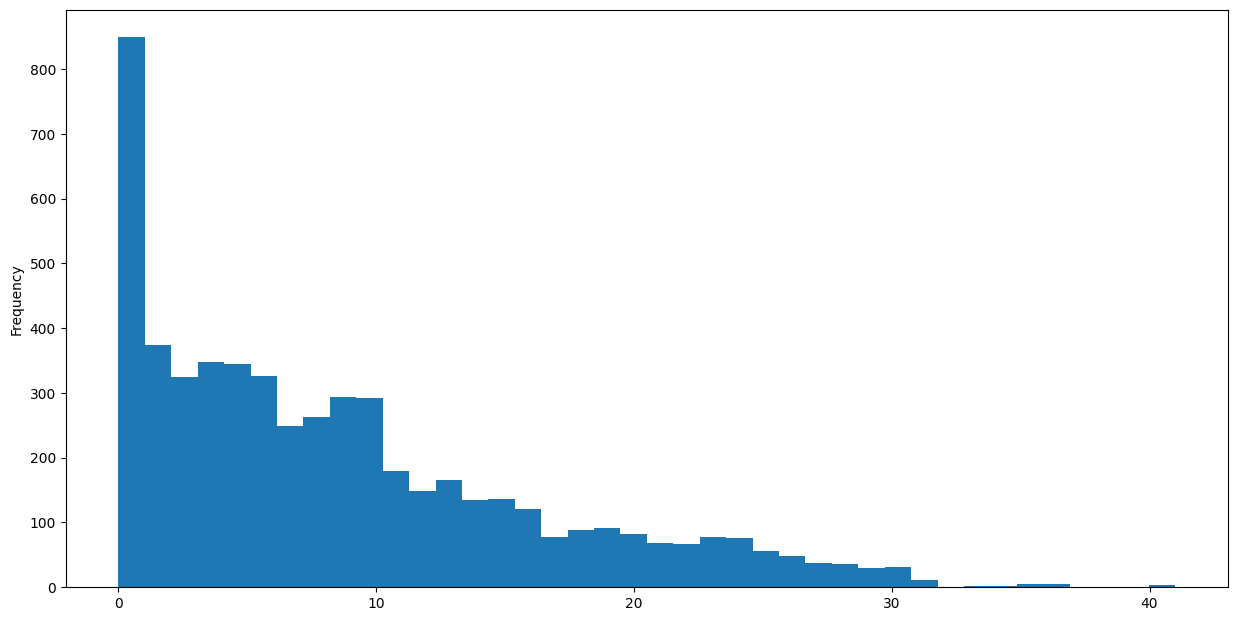

In [26]:
df["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))

In [27]:
df["DEROG"].value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [28]:
df["DELINQ"].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [29]:
df["NINQ"].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

In [30]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [31]:
df["REASON"].fillna(value = "DebtCon",inplace = True)
df["JOB"].fillna(value = "Other",inplace = True)

In [32]:
df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)

In [33]:
df.fillna(value=df.mean(),inplace=True)

<ipython-input-33-882009da7771>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value=df.mean(),inplace=True)


In [34]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [35]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_basic = df.drop(columns=["BAD","JOB","REASON"])
y = df["BAD"]

x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

logreg_basic.fit(x_basic_tr,y_tr)
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)
y_pre = logreg_basic.predict(x_basic_te)

intercept 
[-1.59627066e-05]

coefficients 
[[-1.74585580e-05 -4.03509497e-06  2.41619806e-06 -2.45188332e-04
   6.35257531e-05  9.45516742e-05 -6.12407301e-03  6.99725625e-05
  -2.10155129e-04 -1.50331853e-04]]


In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)


accuracy score :  0.7935943060498221
f1 score :  0.44246031746031744
precision score :  0.39679715302491103
recall score :  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1561    0]
 [ 406    0]]


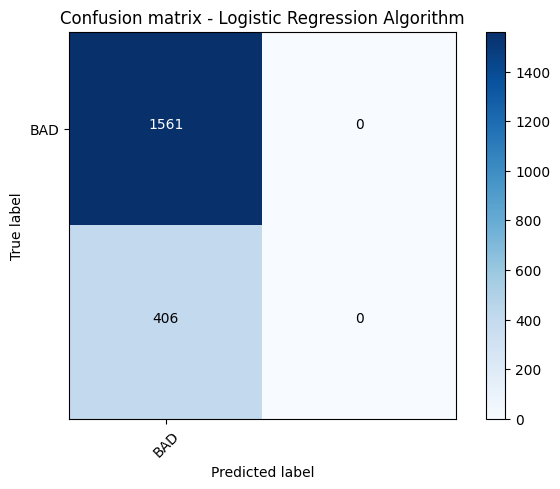

In [39]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
dectree_basic.fit(x_basic_tr,y_tr)

y_pre = dectree_basic.predict(x_basic_te)

In [41]:
a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

accuracy score :  0.8617183528215556
f1 score :  0.7803930582691645
precision score :  0.7930622870579203
recall score :  0.7698148843579491


Confusion matrix, without normalization
[[1446  115]
 [ 157  249]]


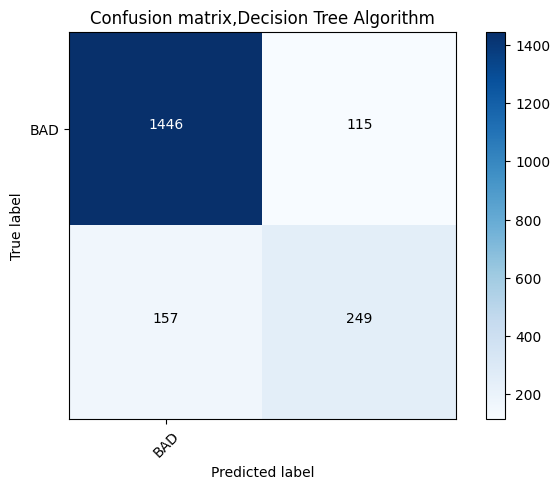

In [42]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

In [43]:
df.loc[df["CLAGE"]>=600,"CLAGE"] = 600
df.loc[df["VALUE"]>=400000,"VALUE"] = 400000
df.loc[df["MORTDUE"]>=300000,"MORTDUE"] = 300000
df.loc[df["DEBTINC"]>=100,"DEBTINC"] = 100

In [44]:
df["B_DEROG"] = (df["DEROG"]>=1)*1
df["B_DELINQ"] = (df["DELINQ"]>=1)*1

In [45]:
df["JOB"].unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

In [46]:
df["REASON_1"] = (df["REASON"] == "HomeImp")*1
df["REASON_2"] = (df["REASON"] != "HomeImp")*1
df["JOB_1"] = (df["JOB"]=="Other")*1
df["JOB_2"] = (df["JOB"]=="Office")*1
df["JOB_3"] = (df["JOB"]=="Sales")*1
df["JOB_4"] = (df["JOB"]=="Mgr")*1
df["JOB_5"] = (df["JOB"]=="ProfExe")*1
df["JOB_6"] = (df["JOB"]=="Self")*1
df.drop(["JOB","REASON"],axis = 1,inplace = True)

In [47]:
df["YOJ"] = df["YOJ"].apply(lambda t : np.log(t+1))

In [48]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_1,REASON_2,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
0,1,1100,25860.0000,39025.000000,2.442347,0.0,0.0,94.366667,1.000000,9.000000,...,0,0,1,0,1,0,0,0,0,0
1,1,1300,70053.0000,68400.000000,2.079442,0.0,2.0,121.833333,0.000000,14.000000,...,0,1,1,0,1,0,0,0,0,0
2,1,1500,13500.0000,16700.000000,1.609438,0.0,0.0,149.466667,1.000000,10.000000,...,0,0,1,0,1,0,0,0,0,0
3,1,1500,73760.8172,101776.048741,2.294782,0.0,0.0,179.766275,1.186055,21.296096,...,0,0,0,1,1,0,0,0,0,0
4,0,1700,97800.0000,112000.000000,1.386294,0.0,0.0,93.333333,0.000000,14.000000,...,0,0,1,0,0,1,0,0,0,0


In [49]:
df.corr(method='pearson')

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_1,REASON_2,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
BAD,1.000000,-0.075099,-0.049420,-0.043711,-0.053066,0.269921,0.346503,-0.173412,0.168851,-0.004067,...,0.261216,0.308153,0.037517,-0.037517,0.037949,-0.073613,0.050934,0.032583,-0.043561,0.046245
LOAN,-0.075099,1.000000,0.214803,0.338749,0.102458,0.006996,-0.028869,0.088875,0.043160,0.071804,...,0.009079,-0.030646,-0.151477,0.151477,-0.058067,-0.018060,-0.044993,0.018769,0.017488,0.158452
MORTDUE,-0.049420,0.214803,1.000000,0.816001,-0.052771,-0.046526,0.002095,0.132928,0.026853,0.314779,...,-0.041471,-0.014568,-0.026941,0.026941,-0.259602,-0.066813,0.026023,0.076687,0.256575,0.107944
VALUE,-0.043711,0.338749,0.816001,1.000000,0.023878,-0.041263,-0.000578,0.178638,-0.004635,0.283654,...,-0.040482,-0.034988,-0.012308,0.012308,-0.288132,-0.058463,0.018250,0.051960,0.282653,0.163060
YOJ,-0.053066,0.102458,-0.052771,0.023878,1.000000,-0.050552,0.023185,0.145111,-0.052621,0.042928,...,-0.058295,0.023075,0.060306,-0.060306,0.023324,-0.066539,-0.041243,0.029926,0.024664,-0.010586
DEROG,0.269921,0.006996,-0.046526,-0.041263,-0.050552,1.000000,0.171286,-0.081231,0.146700,0.050727,...,0.755021,0.171622,-0.008406,0.008406,0.034537,-0.049223,0.030659,0.031342,-0.033939,0.000836
DELINQ,0.346503,-0.028869,0.002095,-0.000578,0.023185,0.171286,1.000000,0.026713,0.057212,0.159378,...,0.188767,0.748356,0.004024,-0.004024,-0.044718,0.005268,-0.016502,0.059350,-0.002911,0.021694
CLAGE,-0.173412,0.088875,0.132928,0.178638,0.145111,-0.081231,0.026713,1.000000,-0.110857,0.242213,...,-0.083332,0.007707,0.050670,-0.050670,-0.080490,0.000032,0.026502,-0.022948,0.112309,-0.010872
NINQ,0.168851,0.043160,0.026853,-0.004635,-0.052621,0.146700,0.057212,-0.110857,1.000000,0.085148,...,0.152237,0.059767,-0.115992,0.115992,0.054470,-0.063735,-0.035677,0.069826,-0.061553,0.016229
CLNO,-0.004067,0.071804,0.314779,0.283654,0.042928,0.050727,0.159378,0.242213,0.085148,1.000000,...,0.035880,0.154674,-0.107224,0.107224,-0.197815,-0.004549,0.049185,0.060210,0.165109,0.031325


In [50]:
feat1=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","LOAN","JOB_2","YOJ","JOB_3","MORTDUE"]


In [51]:
x = df[feat1]
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a3 = accuracy_score(y_te,y_pre)
f3 = f1_score(y_te, y_pre, average="macro")
p3 = precision_score(y_te, y_pre, average="macro")
r3 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

accuracy score :  0.8281647178444331
f1 score :  0.6502062419765557
precision score :  0.7766109676651902
recall score :  0.6247487242925622


Confusion matrix, without normalization
[[1516   45]
 [ 293  113]]


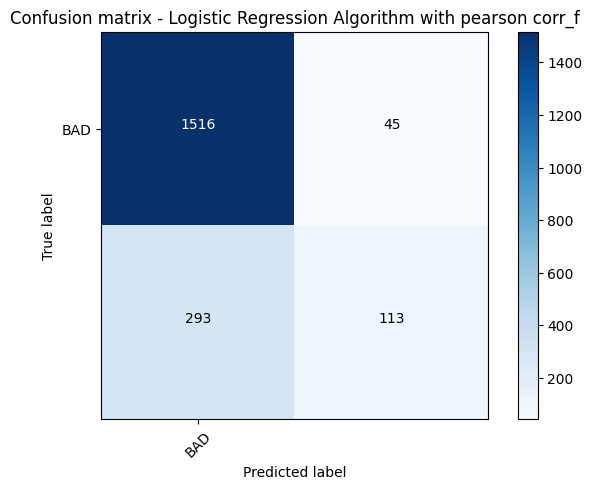

In [52]:

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

In [53]:
clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a4 = accuracy_score(y_te,y_pre)
f4 = f1_score(y_te, y_pre, average="macro")
p4 = precision_score(y_te, y_pre, average="macro")
r4 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("")

accuracy score :  0.8673106253177427
f1 score :  0.7919179096583095
precision score :  0.8005563618771165
recall score :  0.7842729019859065



Confusion matrix, without normalization
[[1445  116]
 [ 145  261]]


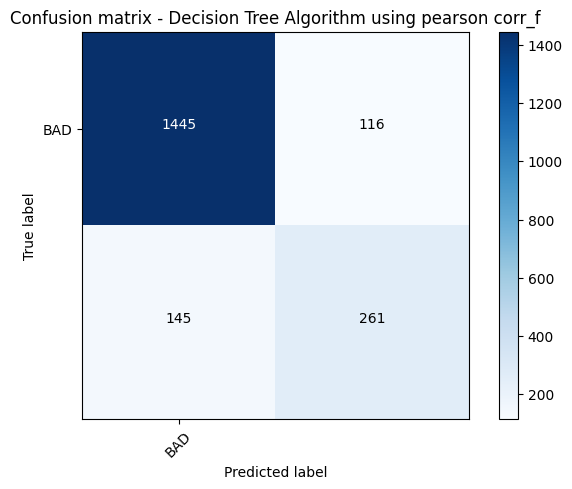

In [54]:

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Decision Tree Algorithm using pearson corr_f')

plt.show()

In [55]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
df_new = pd.DataFrame(SelectKBest(chi2, k=10).fit_transform(df.drop(["BAD"],axis = 1),df["BAD"]))

In [56]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,25860.0000,39025.000000,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0
1,1300.0,70053.0000,68400.000000,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0
2,1500.0,13500.0000,16700.000000,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0
3,1500.0,73760.8172,101776.048741,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0
4,1700.0,97800.0000,112000.000000,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0


In [57]:
x = df_new
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

accuracy score :  0.7935943060498221
f1 score :  0.44246031746031744
precision score :  0.39679715302491103
recall score :  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[1561    0]
 [ 406    0]]


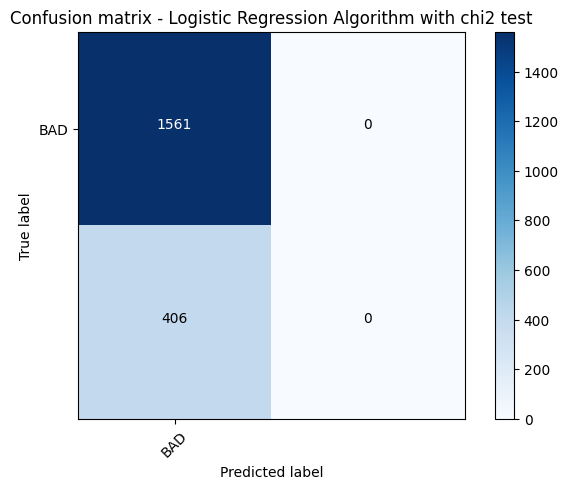

In [58]:

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
 title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

plt.show()


In [59]:
clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a6 = accuracy_score(y_te,y_pre)
f6 = f1_score(y_te, y_pre, average="macro")
p6 = precision_score(y_te, y_pre, average="macro")
r6 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)

accuracy score :  0.8571428571428571
f1 score :  0.7768282574033316
precision score :  0.7837864450424151
recall score :  0.7705769952947934


Confusion matrix, without normalization
[[1433  128]
 [ 153  253]]


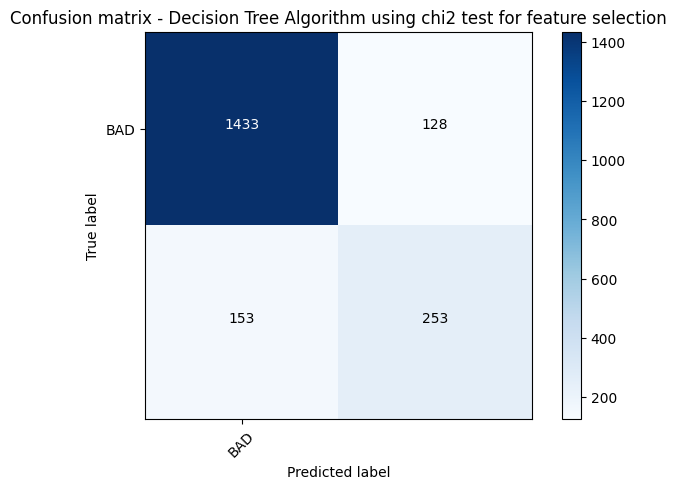

In [60]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Decision Tree Algorithm using chi2 test for feature selection')

plt.show()

In [61]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_1,REASON_2,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
0,1,1100,25860.0000,39025.000000,2.442347,0.0,0.0,94.366667,1.000000,9.000000,...,0,0,1,0,1,0,0,0,0,0
1,1,1300,70053.0000,68400.000000,2.079442,0.0,2.0,121.833333,0.000000,14.000000,...,0,1,1,0,1,0,0,0,0,0
2,1,1500,13500.0000,16700.000000,1.609438,0.0,0.0,149.466667,1.000000,10.000000,...,0,0,1,0,1,0,0,0,0,0
3,1,1500,73760.8172,101776.048741,2.294782,0.0,0.0,179.766275,1.186055,21.296096,...,0,0,0,1,1,0,0,0,0,0
4,0,1700,97800.0000,112000.000000,1.386294,0.0,0.0,93.333333,0.000000,14.000000,...,0,0,1,0,0,1,0,0,0,0


In [62]:
from sklearn.feature_selection import f_classif
df_new2 = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(df.drop(["BAD"],axis=1),df["BAD"]))
df_new2.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,2.442347,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0,0.0
1,1300.0,2.079442,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0,0.0
2,1500.0,1.609438,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0,0.0
3,1500.0,2.294782,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0,0.0
4,1700.0,1.386294,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0,1.0


In [63]:
x = df_new2
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a7 = accuracy_score(y_te,y_pre)
f7 = f1_score(y_te, y_pre, average="macro")
p7 = precision_score(y_te, y_pre, average="macro")
r7 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)

accuracy score :  0.8256227758007118
f1 score :  0.6496716000650101
precision score :  0.7634780439121757
recall score :  0.6249696260133867


Confusion matrix, without normalization
[[1509   52]
 [ 291  115]]


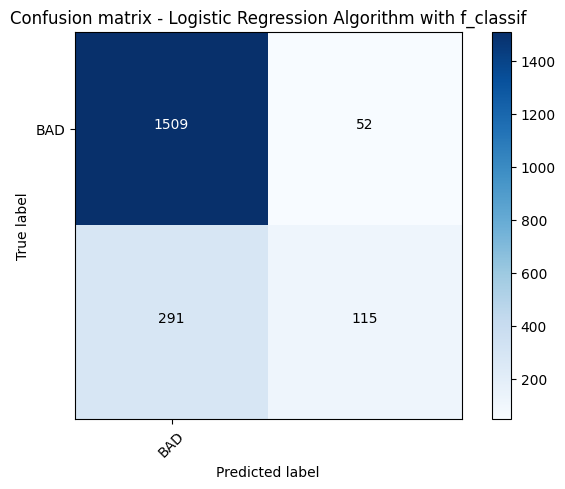

In [64]:

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

In [65]:
clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)

accuracy score :  0.8612099644128114
f1 score :  0.7872029559074758
precision score :  0.7885371182516251
recall score :  0.785896529633966


Confusion matrix, without normalization
[[1427  134]
 [ 139  267]]


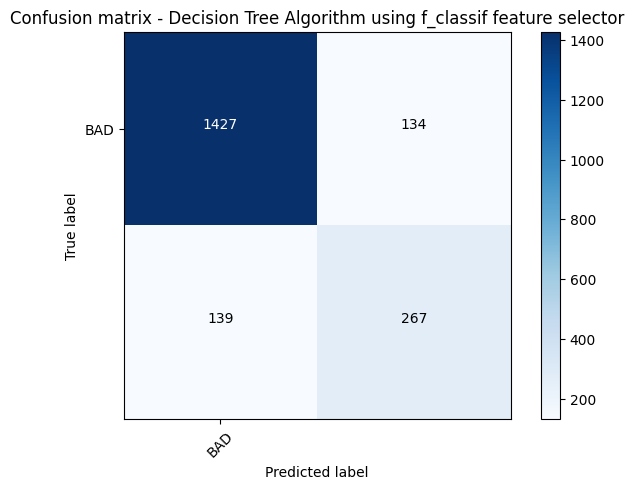

In [66]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Decision Tree Algorithm using f_classif feature selector')

plt.show()

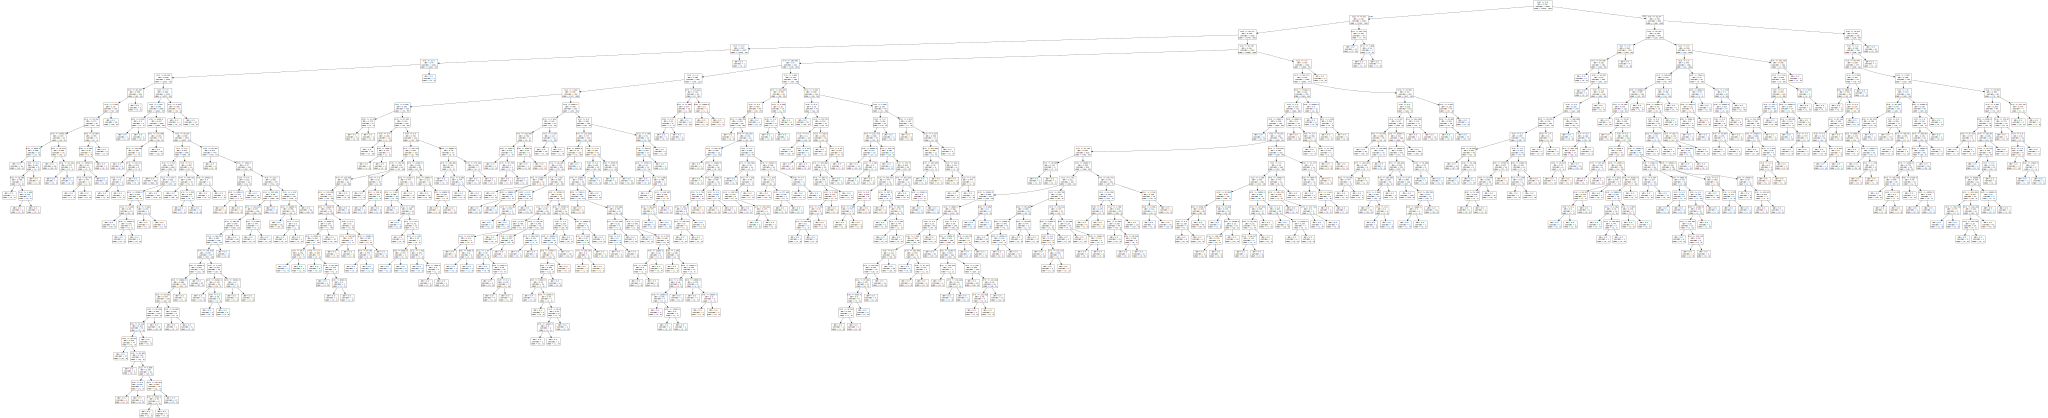

In [67]:
from sklearn import tree
import graphviz
dot_dat = tree.export_graphviz(clf_tree, out_file=None)
graph = graphviz.Source(dot_dat)
graph

In [68]:
from sklearn.feature_selection import f_regression

df_new3 = pd.DataFrame(SelectKBest(f_regression, k=10).fit_transform(df.drop(["BAD"],axis=1),df["BAD"]))
df_new3.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,2.442347,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0,0.0
1,1300.0,2.079442,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0,0.0
2,1500.0,1.609438,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0,0.0
3,1500.0,2.294782,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0,0.0
4,1700.0,1.386294,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0,1.0


In [69]:
x = df_new3
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre2 = logreg.predict(x_te)
a9 = accuracy_score(y_te,y_pre2)
f9 = f1_score(y_te, y_pre2, average="macro")
p9 = precision_score(y_te, y_pre2, average="macro")
r9 = recall_score(y_te, y_pre2, average="macro")
print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)

accuracy score :  0.8256227758007118
f1 score :  0.6496716000650101
precision score :  0.7634780439121757
recall score :  0.6249696260133867


Confusion matrix, without normalization
[[1427  134]
 [ 139  267]]


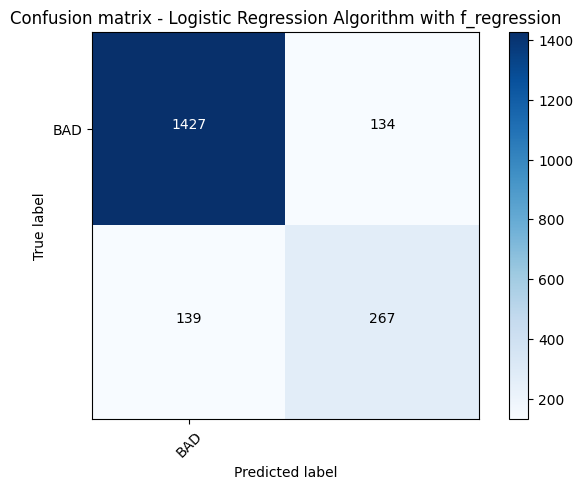

In [70]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm with f_regression')

plt.show()

In [71]:
clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a10 = accuracy_score(y_te,y_pre)
f10 = f1_score(y_te, y_pre, average="macro")
p10= precision_score(y_te, y_pre, average="macro")
r10 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)

accuracy score :  0.8607015760040672
f1 score :  0.7846345775152167
precision score :  0.7884693877551021
recall score :  0.7810201241467671


Confusion matrix, without normalization
[[1431  130]
 [ 144  262]]


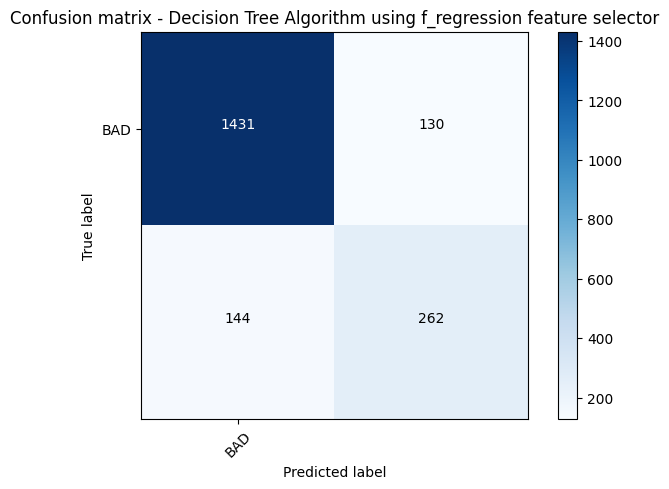

In [72]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Decision Tree Algorithm using f_regression feature selector')

plt.show()

In [73]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','Pearson corr_fact','Pearson corr_fact','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],
    'Recall Score' : [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10],
    'F1 Score' : [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10],
    'Precision Score' : [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
})

In [74]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,0.793594,0.500000,0.442460,0.396797
1,Decision Tree,None,0.861718,0.769815,0.780393,0.793062
2,Logistic Regression,Pearson corr_fact,0.828165,0.624749,0.650206,0.776611
3,Decision Tree,Pearson corr_fact,0.867311,0.784273,0.791918,0.800556
4,Logistic Regression,chi2 test,0.793594,0.500000,0.442460,0.396797
5,Decision Tree,chi2 test,0.857143,0.770577,0.776828,0.783786
6,Logistic Regression,f_classif,0.825623,0.624970,0.649672,0.763478
7,Decision Tree,f_classif,0.861210,0.785897,0.787203,0.788537
8,Logistic Regression,f_regression,0.825623,0.624970,0.649672,0.763478
9,Decision Tree,f_regression,0.860702,0.781020,0.784635,0.788469


In [75]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

Accuracy Score  F1 Score  \
Feature Selection Method Model                                           
None                     Decision Tree              0.861718  0.780393   
                         Logistic Regression        0.793594  0.442460   
Pearson corr_fact        Decision Tree              0.867311  0.791918   
                         Logistic Regression        0.828165  0.650206   
chi2 test                Decision Tree              0.857143  0.776828   
                         Logistic Regression        0.793594  0.442460   
f_classif                Decision Tree              0.861210  0.787203   
                         Logistic Regression        0.825623  0.649672   
f_regression             Decision Tree              0.860702  0.784635   
                         Logistic Regression        0.825623  0.649672   

                                              Precision Score  Recall Score  
Feature Selection Method Model                                               
None                     Decision Tree               0.793062      0.769815  
                         Logistic Regression         0.396797      0.500000  
Pearson corr_fact        Decision Tree               0.800556      0.784273  
                         Logistic Regression         0.776611      0.624749  
chi2 test                Decision Tree               0.783786      0.770577  
                         Logistic Regression         0.396797      0.500000  
f_classif                Decision Tree               0.788537      0.785897  
                         Logistic Regression         0.763478      0.624970  
f_regression             Decision Tree               0.788469      0.781020  
                         Logistic Regression         0.763478      0.624970

Recall metric in the testing dataset:  0.9088669950738916
Accuracy score for the testing dataset:  0.5043213014743264
Confusion matrix, without normalization
[[623 938]
 [ 37 369]]

Recall metric in the testing dataset:  0.6674876847290641
Accuracy score for the testing dataset:  0.7391967463141841
Confusion matrix, without normalization
[[1183  378]
 [ 135  271]]

Recall metric in the testing dataset:  0.5
Accuracy score for the testing dataset:  0.8093543467208948
Confusion matrix, without normalization
[[1389  172]
 [ 203  203]]

Recall metric in the testing dataset:  0.3669950738916256
Accuracy score for the testing dataset:  0.8235892221657346
Confusion matrix, without normalization
[[1471   90]
 [ 257  149]]

Recall metric in the testing dataset:  0.2832512315270936
Accuracy score for the testing dataset:  0.8256227758007118
Confusion matrix, without normalization
[[1509   52]
 [ 291  115]]

Recall metric in the testing dataset:  0.22167487684729065
Accuracy score for the testing

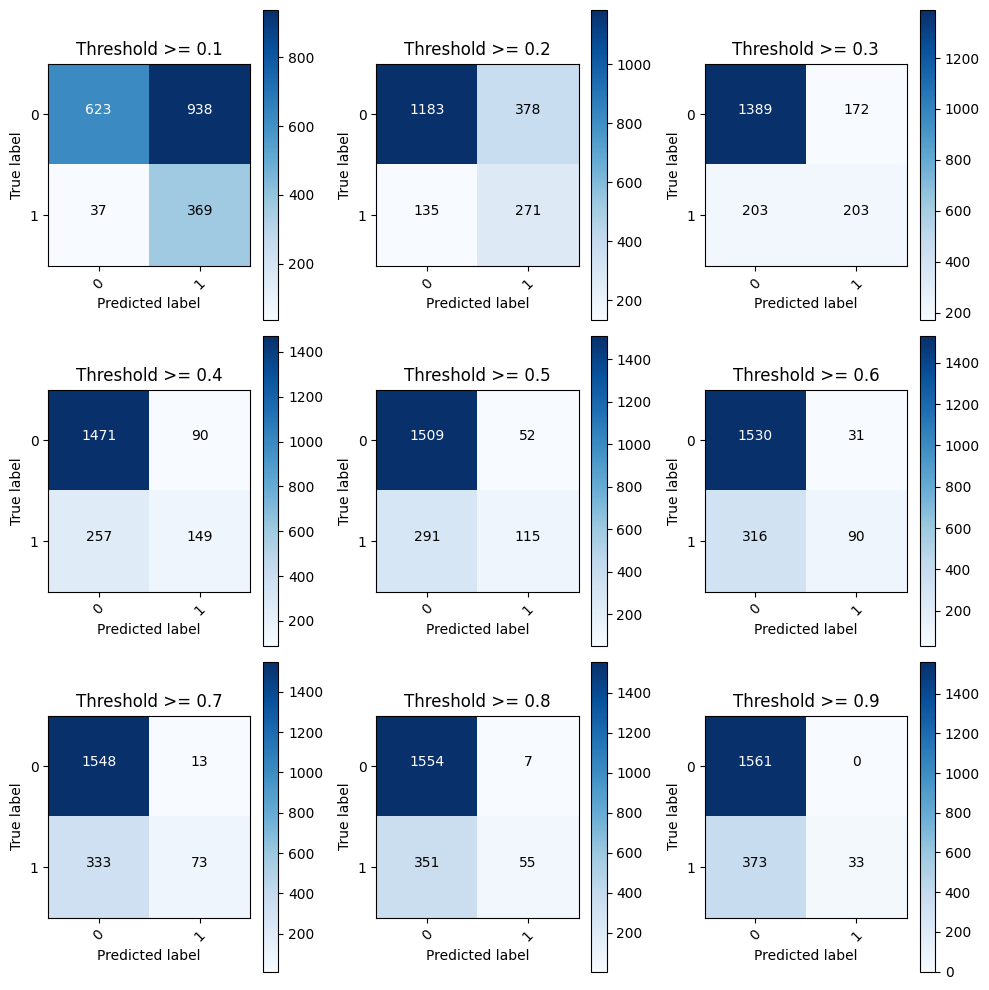

In [76]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_pred_proba = lr.predict_proba(x_te)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i

    plt.subplot(3,3,j)
    j += 1


    cnf_matrix = confusion_matrix(y_te,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_te, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")

In [77]:
default_len = len(df[df["BAD"]==1])
default_indices = np.array(df[df["BAD"]==1].index)

good_indices = np.array(df[df["BAD"]==0].index)
rand_good_indices = np.random.choice(good_indices, default_len, replace = False)
rand_good_indices = np.array(rand_good_indices)

combined_indices = np.concatenate([rand_good_indices,default_indices])

comb_df = df.iloc[combined_indices,:]
comb_y = comb_df["BAD"]

In [78]:
from sklearn.feature_selection import f_classif
comb_x = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(comb_df.drop(["BAD"],axis=1),comb_df["BAD"]))
comb_x.head()

,0,1,2,3,4,5,6,7,8,9
0,33200.0,3.091042,0.0,0.0,177.247554,0.0,38.981210,0.0,0.0,0.0
1,23300.0,2.294782,0.0,0.0,174.239981,2.0,37.912872,0.0,0.0,0.0
2,13000.0,1.609438,0.0,0.0,110.477957,1.0,38.521759,0.0,0.0,0.0
3,21000.0,1.504077,0.0,0.0,97.633333,2.0,33.779915,0.0,0.0,0.0
4,27900.0,0.693147,0.0,0.0,167.614450,2.0,40.620885,0.0,0.0,1.0


In [79]:
x_trc,x_tec,y_trc,y_tec = train_test_split(comb_x,comb_y,test_size =.33,random_state=1000)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.65
0.6296296296296297
0.6153846153846154
0.680628272251309

Accuracy Score =  0.7133757961783439
F1 Score =  0.7125529529132035
Precision Score =  0.714579895759671
Recall Score =  0.712766026515004

Confusion matrix, without normalization
[[301  97]
 [128 259]]


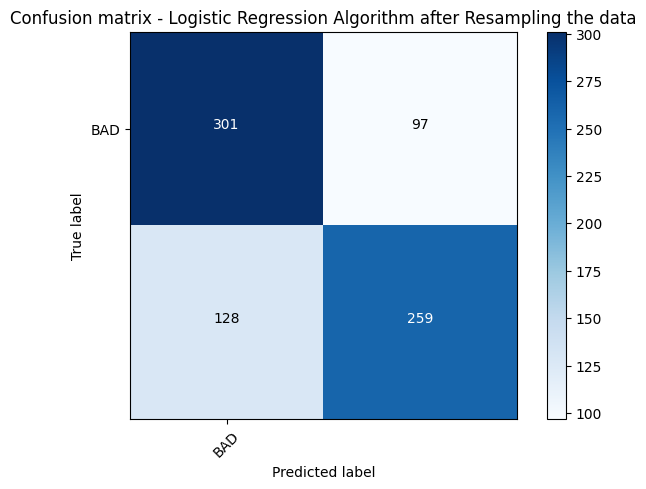

In [80]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, confusion_matrix

lr = LogisticRegression()

def printing_Kfold_scores(x_trc, y_trc):
    fold = KFold(n_splits=4, shuffle=False)
    for train_idx, test_idx in fold.split(x_trc):
        x_train = x_trc.iloc[train_idx, :]
        y_train = y_trc.iloc[train_idx]
        x_test = x_trc.iloc[test_idx, :]
        y_test = y_trc.iloc[test_idx]
        lr.fit(x_train, y_train)
        y_pred_undersample = lr.predict(x_test)
        recall_acc = recall_score(y_test, y_pred_undersample)
        print(recall_acc)

printing_Kfold_scores(x_trc, y_trc)

y_predr = lr.predict(x_tec)

print("")
print('Accuracy Score = ', accuracy_score(y_tec, y_predr))
print('F1 Score = ', f1_score(y_tec, y_predr, average="macro"))
print('Precision Score = ', precision_score(y_tec, y_predr, average="macro"))
print('Recall Score = ', recall_score(y_tec, y_predr, average="macro"))
print("")
cnf_matrix = confusion_matrix(y_tec, y_predr)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm after Resampling the data')

plt.show()


0.795
0.7546296296296297
0.717948717948718
0.7905759162303665

Accuracy Score =  0.7630573248407644
F1 Score =  0.7628537460045217
Precision Score =  0.7632682926829268
Recall Score =  0.7627965408437536

Confusion matrix, without normalization
[[311  87]
 [ 99 288]]


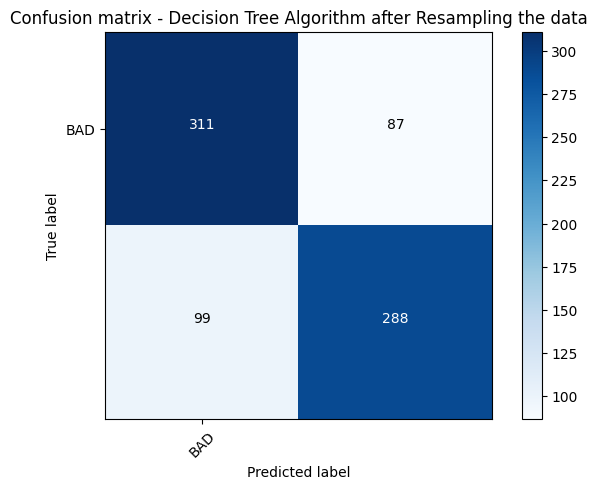

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, confusion_matrix

lr = DecisionTreeClassifier()

from sklearn.model_selection import KFold

def printing_Kfold_scores(x_trc, y_trc):
    fold = KFold(n_splits=4, shuffle=False)
    for train_idx, test_idx in fold.split(x_trc):
        x_train = x_trc.iloc[train_idx, :]
        y_train = y_trc.iloc[train_idx]
        x_test = x_trc.iloc[test_idx, :]
        y_test = y_trc.iloc[test_idx]
        lr.fit(x_train, y_train)
        y_pred_undersample = lr.predict(x_test)
        recall_acc = recall_score(y_test, y_pred_undersample)
        print(recall_acc)

printing_Kfold_scores(x_trc, y_trc)

y_predr = lr.predict(x_tec)
print("")
print('Accuracy Score = ', accuracy_score(y_tec, y_predr))
print('F1 Score = ', f1_score(y_tec, y_predr, average="macro"))
print('Precision Score = ', precision_score(y_tec, y_predr, average="macro"))
print('Recall Score = ', recall_score(y_tec, y_predr, average="macro"))
print("")

cnf_matrix = confusion_matrix(y_tec, y_predr)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Decision Tree Algorithm after Resampling the data')

plt.show()